# MNIST 

In [2]:
# Numerical computation and visualization libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Pytorch Libraries
import torch
import torchvision
import torchvision.transforms as tr
import torch.nn as nn
from torch.utils.data import random_split
import torch.optim as optim
from torchvision import models
import copy

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [4]:
# Dataset 

trainset = torchvision.datasets.MNIST(root='./data',
                                      train=True,
                                      download=True,
                                      #transform=tr.ToTensor()
                                      )


testset = torchvision.datasets.MNIST(root='./data',
                                     train=False,
                                     download=True,
                                     #transform=tr.ToTensor()
                                    )

print('Len of train dataset ',len(trainset))
print('Len of test dataset ',len(testset))
print('-'*30)
print(trainset)
print(testset)
print('-'*30)
print(trainset[0])
print(testset[0])
print('-'*30)
trainset[0][0]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!



Len of train dataset  60000
Len of test dataset  10000
------------------------------
Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
------------------------------
(<PIL.Image.Image image mode=L size=28x28 at 0x7FE89FBB5E90>, 5)
(<PIL.Image.Image image mode=L size=28x28 at 0x7FE89FBB56D0>, 7)
------------------------------


/opt/conda/conda-bld/pytorch_1591914880026/work/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Label : 9



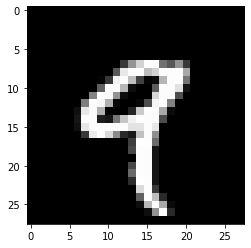

In [5]:
# Loading images and labels for fifth item dataitem

image , label = trainset[4]
plt.imshow(image,cmap='gray')
print('Label :',label)

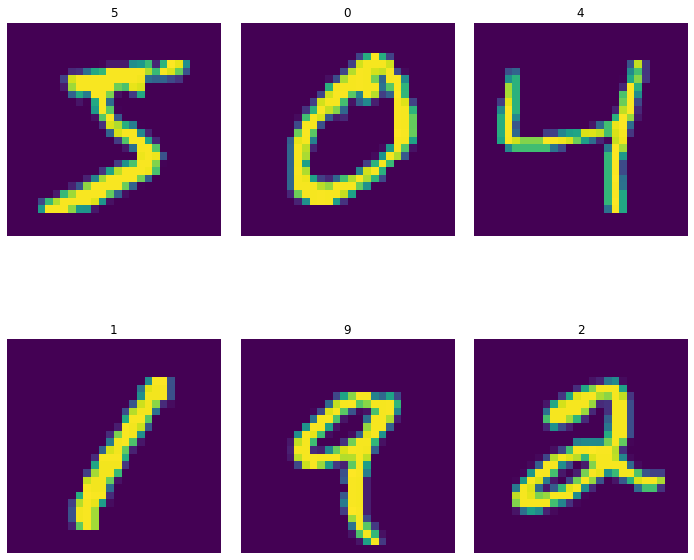

In [6]:
fig , ax = plt.subplots(nrows=2,ncols=3,figsize=(10,10))

image , label = trainset[0]
ax[0,0].imshow(image)
ax[0,0].set_title(label)
ax[0,0].axis('off')

image , label = trainset[1]
ax[0,1].imshow(image)
ax[0,1].set_title(label)
ax[0,1].axis('off')

image , label = trainset[2]
ax[0,2].imshow(image)
ax[0,2].set_title(label)
ax[0,2].axis('off')

image , label = trainset[3]
ax[1,0].imshow(image)
ax[1,0].set_title(label)
ax[1,0].axis('off')

image , label = trainset[4]
ax[1,1].imshow(image)
ax[1,1].set_title(label)
ax[1,1].axis('off')

image , label = trainset[5]
ax[1,2].imshow(image)
ax[1,2].set_title(label)
ax[1,2].axis('off')

plt.tight_layout(pad=2)

In [7]:
#Converting the Dataset into tensors

trainset = torchvision.datasets.MNIST(root='./data',
                                      train=True,
                                      download=True,
                                      transform=tr.ToTensor()
                                      )


testset = torchvision.datasets.MNIST(root='./data',
                                     train=False,
                                     download=True,
                                     transform=tr.ToTensor()
                                    )

In [8]:
# Split the data into train and validation set

trainset , valset = random_split(trainset,[50000,10000])
len(trainset),len(valset)

(50000, 10000)

In [9]:
batch_size= 256

trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=batch_size,
                                          shuffle=True)

valloader = torch.utils.data.DataLoader(valset,
                                          batch_size=batch_size,
                                          shuffle=False)

testloader = torch.utils.data.DataLoader(testset,
                                          batch_size=batch_size,
                                          shuffle=False)

classes = ('0','1','2','3','4','5','6','7','8','9')

torch.Size([256, 1, 28, 28])
torch.Size([1, 28, 28])
1


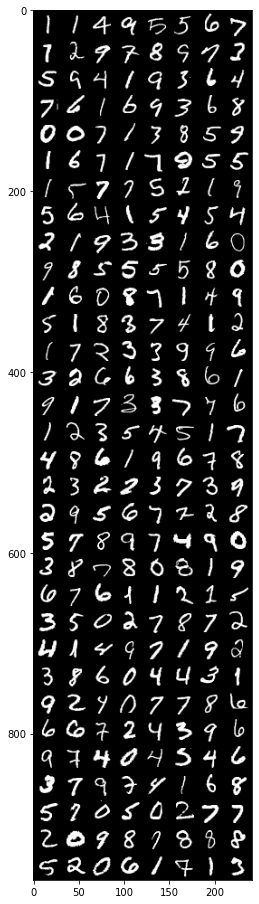

In [10]:
images , labels= next(iter(trainloader))
print(images.shape)
print(images[1].shape)
print(labels[1].item())

plt.figure(figsize=(8,16))
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()
    
    
imshow(torchvision.utils.make_grid(images))

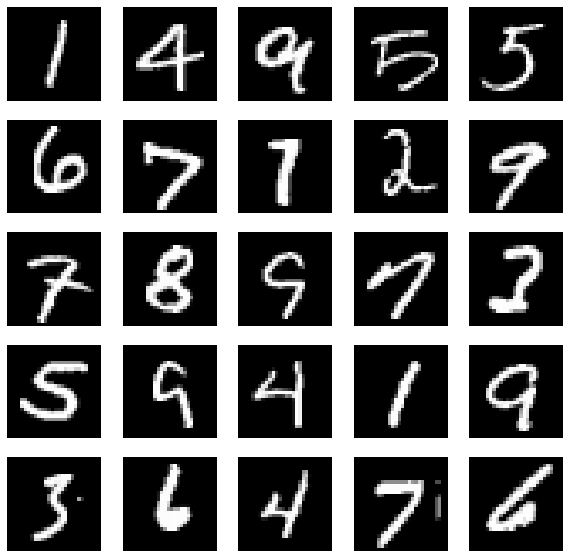

In [11]:
# Plotting images 

plt.figure(figsize=(10,10))
plt.subplot(321)
for i in range(25):
    ax1 = plt.subplot(5,5,i+1)
    plt.imshow(images[i+1].reshape(28,28).detach().numpy(),cmap='gray')
    #plt.title(labels[i+1].item())
    plt.axis('off')
plt.show()

## Train LeNet

In [12]:
# Defining a custom LeNet module

class LeNet(nn.Module):                         # Extending nn.Module class 
    def __init__(self):                         # Constructor 
        super(LeNet,self).__init__()            # Calls the constructor of nn.Module
        self.cnn_model = nn.Sequential(         # nn.Sequentila allows multiple layers to stack together
            nn.Conv2d(1,6,5),                   #(N,1,28,28) -> (N,6,24,24)
            nn.Tanh(),                      
            nn.AvgPool2d(2,stride=2),           #(N,6,24,24) -> (N,6,12,12)
            nn.Conv2d(6,16,5),                  #(N,6,12,12) -> (N,16,8,8)
            nn.Tanh(),
            nn.AvgPool2d(2,stride=2)            #(N,16,8,8) -> (N,16,4,4)
            )
        
        self.fc_model = nn.Sequential(          # Fully connected layer 
            nn.Linear(256,120),
            nn.Tanh(),
            nn.Linear(120,84),
            nn.Tanh(),
            nn.Linear(84,10)
        
            )
        
# It get a batch of data which have defined earlier 
        
    def forward(self,x):     
        #print(x.shape)
        x = self.cnn_model(x)       
        #print(x.shape)
        x = x.view(x.size(0),-1)    # Flatning the inputs from tensors to vectors 
        #print(x.shape)
        x = self.fc_model(x)        # Passing the conv layer to fully connected layer
        #print(x.shape)
        return x
    
net = LeNet()#.to(device)
net

LeNet(
  (cnn_model): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [13]:
print(net.fc_model[4].weight.shape,net.fc_model[4].bias.shape)
#list(net.parameters())

torch.Size([10, 84]) torch.Size([10])


In [14]:
# Evaluate on the basics of accuracy

def evaluation(dataloader):
    total , correct = 0,0
    for data in dataloader:
        inputs , labels = data
        inputs , labels = inputs.to(device) , labels.to(device)
        output = net(inputs)            
        max_pred,pred = torch.max(output.data,dim=1)
        total +=labels.size(0)
        correct +=(pred == labels).sum().item()  
    return 100 * correct / total

In [15]:
net = LeNet().to(device)           # Creating object for LeNet() model and passing it to GPU 

loss_fn = nn.CrossEntropyLoss()    # It takes the highest value which is the predictions and mark it as 1
                                   # And mark rest of the values as zeros. 
opt = optim.Adam(net.parameters()) # Using adam Optimization algorithm , we can also specify the hyperparameters .

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs
Val accuracy: 92.42 , Train accuracy : 92.49
Val accuracy: 95.08 , Train accuracy : 95.37
Val accuracy: 96.44 , Train accuracy : 96.62
Val accuracy: 97.02 , Train accuracy : 97.59
Val accuracy: 97.27 , Train accuracy : 97.84
Val accuracy: 97.58 , Train accuracy : 98.35
Val accuracy: 97.77 , Train accuracy : 98.55
Val accuracy: 97.89 , Train accuracy : 98.52
Val accuracy: 98.11 , Train accuracy : 98.99
Val accuracy: 98.11 , Train accuracy : 99.06
Val accuracy: 98.24 , Train accuracy : 99.15
Val accuracy: 98.49 , Train accuracy : 99.36
Val accuracy: 98.48 , Train accuracy : 99.45
Val accuracy: 98.46 , Train accuracy : 99.55
Val accuracy: 98.29 , Train accuracy : 99.54
Val accuracy: 98.49 , Train accuracy : 99.65


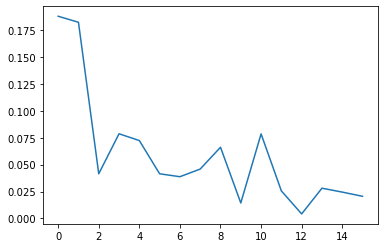

In [16]:
# Fit the model and perform the training process 

%time
def fit(max_epochs =16):
    
    loss_arr = []
    loss_epoch_arr = []
    
    for epoch in range(max_epochs):
        for i, data in enumerate(trainloader,0): # Iterating through the train loader 
            inputs,labels = data
            inputs,labels = inputs.to(device),labels.to(device)

            opt.zero_grad()     # Reset the gradient in every iteration

            outputs = net(inputs)
            loss = loss_fn(outputs,labels)   # Loss forward pass
            loss.backward()                  # Loss backaed pass
            opt.step()                       # Update all the parameters by the given learnig rule

            loss_arr.append(loss.item())
        loss_epoch_arr.append(loss.item())
        print('Val accuracy: %0.2f , Train accuracy : %0.2f'%(evaluation(valloader),evaluation(trainloader)))

    plt.plot(loss_epoch_arr)
    plt.show()
    
fit()

Image Shape : torch.Size([256, 6, 24, 24])


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


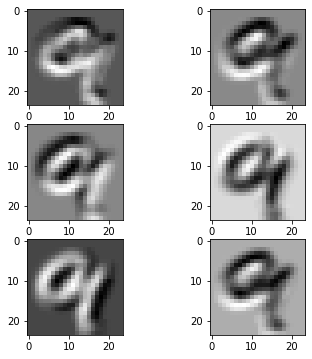

In [17]:
# Here we are visualiizing the behaviour of image in the first layer () of LeNet Architecture 

net = net.to('cpu')                    # Taking the model back to the CPU 
out = net.cnn_model[0](images)
print('Image Shape :',out.shape)
image_id = 3

plt.figure(figsize=(6,6))
plt.subplot(321)
for i in range(6):
    ax1 = plt.subplot(3,2,i+1)
    plt.imshow(out[image_id,i,:,:].detach().numpy(),cmap='gray')
plt.show()

Shape : torch.Size([1, 28, 28])
Label : 7
torch.Size([1, 1, 28, 28])


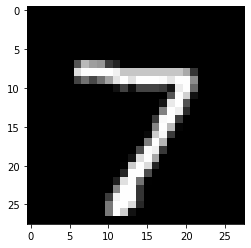

In [18]:
img , label = testset[0]
plt.imshow(img[0],cmap='gray')
print('Shape :',img.shape)
print('Label :',label)
print(img.unsqueeze(0).shape)

# img.unsqueeze simply adds another dimension at the begining of the 1x28x28 
# tensor, making it a 1x1x28x28 tensor, which the model views as a batch containing a single image.

In [19]:
# Function which loads the prediction of our model

def predict_image(img,model):
    xb = img.unsqueeze(0)
    yb = net(xb)
    _,pred = torch.max(yb,dim=1)
    return pred[0].item()

Label : 9 Predicted 9


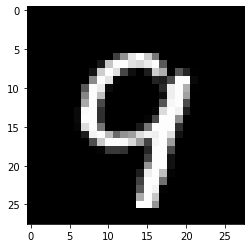

In [20]:
img , label = testset[16]
plt.imshow(img[0],cmap='gray')
print('Label :',label,'Predicted',predict_image(img,net))

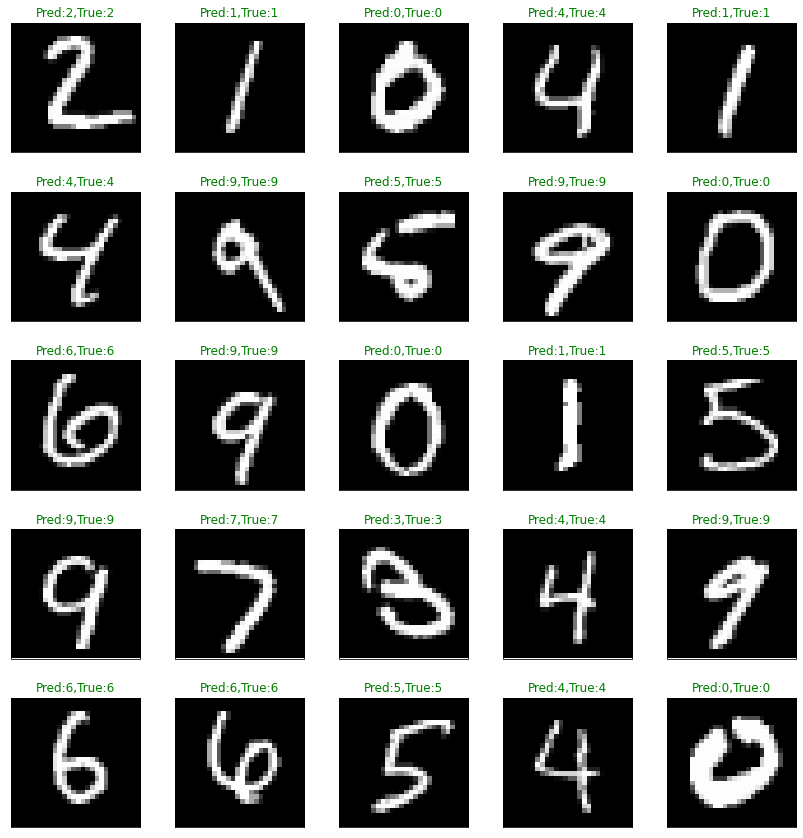

In [21]:
# Function which loads the prediction of our model

def predict_image(img,model):              # Here we are giving an input  tensor
    xb = img.unsqueeze(0)                  # Adding another dimention because our model accepts a bath
    yb = net(xb)                           # Passing the bacth into the model
    _,pred = torch.max(yb,dim=1)           # Getting the prediction from output (_ : will give the max prob and prob : will give the index of highest prob)              
    return pred[0].item()

# View the actual label and prediction of our model

plt.figure(figsize=(12,12))
plt.subplot(321)
for i in range(25):
    ax1 = plt.subplot(5,5,i+1)
    img , label = testset[i+1]
    plt.imshow(img[0],cmap='gray')
    if predict_image(img,net) == label:
        color = 'green'
    else:
        color = 'red'
    
    
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout(pad=2)
    plt.title('Pred:{},True:{}'.format(predict_image(img,net),label),color=color)
plt.show()

In [22]:
torch.save(net.state_dict(), 'mnist-ResNet.pth')